#A Neural Network is a big stack of Linear and Non Linear functions

# Classification

 Classification is a problem of predicting weather something is one thing or the another.

 Types:

* binary classification
* multiclass classfication
* multilabel classification

#Contents:

* architecture of the Nn classification model

* input shapes and output of a classification model

* creating custom data to view, fit on and predict on

* steps in modelling

 1. creating a model, setting a loss function and optimizer, creating a training loop, evaluating a model

* Saving and loading models

* Harnessing the power of non- linearity

* different classification evaluation methods

inputs --> algortihm --> outputs


for an image input --> w: 224, h: 224, c:3 (pixel values) this is how we can numerically represent an image.

In [126]:
# training with large minibatches is bad for your health. it is bad for the test error as well.
# friends don't let friends use minibatches larger than 32.

In [127]:
#the shape of the input and output depends on the problem.

#  Make classification data and get it ready


In [128]:

import sklearn
from sklearn.datasets import make_circles

#make 1000 samples
n_samples = 1000

#create circles
x, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [129]:
len(x) , len(y)

(1000, 1000)

In [130]:
print(f'first 5 samples of x: \n{x[:5]}')
print(f'first 5 samples of y: \n{y[:5]}')

first 5 samples of x: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y: 
[1 1 1 1 0]


In [131]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [132]:
# make dataframe of circle data

import pandas as pd
circles = pd.DataFrame({"X1": x[:,0] ,
                        "X2": x[:,1] ,
                        "label":y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


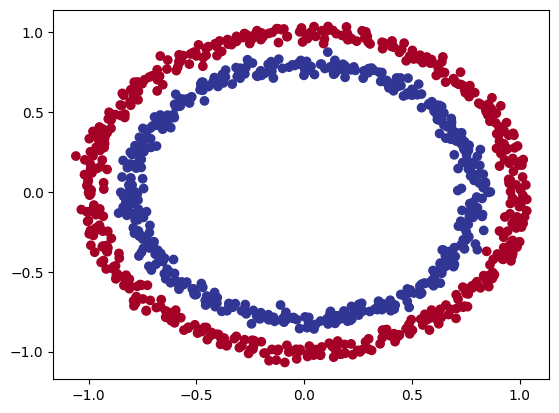

In [133]:
#visualisation
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0],
            y=x[:,1],
            c=y, #c : array-like or list of colors or color
            cmap=plt.cm.RdYlBu); #The 'RdYlBu' colormap is a sequential colormap that goes from red (Rd) to yellow (Yl) to blue (Bu)

note: the data we are working with is referred to as a toy dataset

#1. convert to tensors

In [134]:
#1.1 check input and output shapes

x.shape, y.shape

((1000, 2), (1000,))

In [135]:
# view the first example of features and labels

x_sample = x[0]
y_sample = y[0]

print(f'values for one sample of x : {x_sample} and the same for y: {y_sample}')
print(f'values for one sample of x : {x_sample.shape} and the same for y: {y_sample.shape}')

values for one sample of x : [0.75424625 0.23148074] and the same for y: 1
values for one sample of x : (2,) and the same for y: ()


y is scaler , doesnt have  a shape

In [136]:
#1.2 get our data into tensors and create train and test splits

import torch
torch.__version__

'2.2.1+cu121'

In [137]:
type(x) , x.dtype

(numpy.ndarray, dtype('float64'))

In [138]:
# convert numpy array into tensors

x = torch.from_numpy(x).type(torch.float) # we are doing this type because we want the default float32 value of tensor
y = torch.from_numpy(y).type(torch.float)


In [139]:
x[:5] , y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [140]:
type(x) , x.dtype , y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [141]:
torch.manual_seed(42)

In [142]:
# split the data into train and test sets

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 42 )

In [143]:
len(x_train) , len(x_test) , len(y_train) , len(y_test)

(800, 200, 800, 200)

In [144]:
n_samples

1000

# steps - to classify our blue and red dots in the circular data

1. setup device agnoistic code, to run on GPU if there is one
2. construct a model
3. define a loss function and optimizer
4. create a training and testing loop

In [145]:
import torch
from torch import nn

#make device agnoistic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [146]:
x_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

# creating a model

1. subclass nn.module
2. create 2 nn.Linear() - layers that are capable of handling shapes of the data
3. define a forward() method - that outlines the forward pass
4. instantiate an instance of our model and send it to the target


In [147]:
x_train.shape

torch.Size([800, 2])

In [148]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [149]:
#1. construct the model

class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    #2. create nn.Linear layers capable of handling the shapes of the data
    self.layer_1 = nn.Linear(in_features = 2 , out_features = 5) #takes in 2 feature and upscales to 5 features to learn more efficiently
    self.layer_2 = nn.Linear(in_features = 5  , out_features = 1) #takes in 5 features from the previous layer and outputs a single feature

  #3. create the forward method
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x --> layer 1 --> layer 2 --> output

#4. instantiate an instance of our model class and send it to the target device
model_0 = CircleModel().to(device)
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [150]:
device

'cpu'

In [151]:
next(model_0.parameters()).device

device(type='cpu')

In [152]:
# replicating the same model using nn.sequential() --> just alternative and quick method

model_1 = nn.Sequential(
    nn.Linear(in_features = 2 , out_features = 5),
    nn.Linear(in_features = 5 , out_features = 1)
).to(device)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

* sequential method --> does most of the code behind the scenes . easier way to create a Neural Network
* On the other hand, the benefit of subclassing is that for a more complex operation, its imp to know how to make your own nn.Module


In [153]:
model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

* these are all randomm values generated by Pytorch, when we make the training loop, use optimizer and perform back propagation, the optimizer is going to change these random values to better representation of our data.

* 0.weight and 0.bias is for the 0th layer and others for the first layer
* 0.weight has 10 values because 2*5 =10, then 0.bias has 5 values because we set out features to 5 in the first layer and same for 1.weight, 1.bias has only single value becuase we set output to 1

In [154]:
# combining both the methods

class Combined(nn.Module):
  def __init__(self):
    super().__init__()

    #first method
    self.linear_one = nn.Linear(in_features = 2 , out_features = 5)
    self.linear_two = nn.Linear(in_features = 5 , out_features = 1)

    #second method
    self.two_layers_together = nn.Sequential(
        nn.Linear(in_features = 2 , out_features = 5),
        nn.Linear(in_features = 5 , out_features = 1)
    )

  def forward(self,x):
    return self.layer_2(self.layer_1(x)) #method 1
    return two_layers_together(x) #method 2


model_3 = Combined().to(device)
model_3

Combined(
  (linear_one): Linear(in_features=2, out_features=5, bias=True)
  (linear_two): Linear(in_features=5, out_features=1, bias=True)
  (two_layers_together): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [155]:
# make predictions (using sequential method)

with torch.inference_mode():
  untrained_preds = model_1(x_test.to(device))

print(f'length of the predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}')
print(f'length of the test samples: {len(x_test)} , shape: {x_test.shape}')
print(f'\nfirst 10 predictions:\n{torch.round(untrained_preds[:10])}')
print(f'\nfirst 10 labels:\n{y_test[:10]}')

length of the predictions: 200, shape: torch.Size([200, 1])
length of the test samples: 200 , shape: torch.Size([200, 2])

first 10 predictions:
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]])

first 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [156]:
#because the numbers are random we don't see good predictions.

In [157]:
y_test[:10] , x_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]))

In [158]:
x_test.shape , y_test.shape

(torch.Size([200, 2]), torch.Size([200]))

* for regression we used L1Loss , we want MAE or MSE
* for classification we might want Binary cross entropy or categorical cross entropy

#Loss Functions and Optimizers

*  a loss function measures, how wrong the predictions of our model are
* in Deep Learning, logits are the layers that feeds into the softmax , the output of the softmax are the probabilities for the classification task and its input is the logit layer
*  two most common optimizers are SGD and Adam.

In [159]:
# set up the loss function and the optimizer
#loss_fn = nn.BCELoss() #measures the Binary Cross Entropy between the target and the input probabilities:

#BCEWithLogitsLoss is more numerically stable.
loss_fn = nn.BCEWithLogitsLoss() #This loss combines a Sigmoid layer and the BCELoss in one single class. BCEWithLogitsLoss is more numerically stable.


optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1)

accuracy: out of 100 examples , what percentage does our model get right.

calculating the accuracy - helpful with classification problems


In [160]:
#torch.eq() is a function used for element-wise equality comparison between two tensors.

def accuracy_fn(y_true , y_pred):
  correct = torch.eq(y_true , y_pred).sum().item() #compares the true labels (y_true) with the predicted labels (y_pred) element-wise, resulting in a tensor of boolean values indicating whether each prediction is correct or not.
  acc = (correct/len(y_pred))*100
  return acc

* our model outputs are going to be raw logits.
* we can convert these logits into prediction probabilities by passing them into some kind of activation fn.
* raw logits --> prediction probabilities --> prediction labels
* we can convert our prediction probabilities into prediction labels by either rounding them or taking the argmax()

In [161]:
#the logits are the raw outputs of the model with no activation functions

#view the first 5 outputs of the forward pass on the test data
with torch.inference_mode():
  y_logits = model_1(x_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [162]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [163]:
#use the activation function on the model logits to turn them into prediction probabilities --> sigmoid

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

#now these logits have gone through the activation function

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

In [164]:
#we cant directly use torch.round before activation function to the raw logits.

* for our prediction value, we need to perform a range-style rounding on them:
* y_pred_probs>=0.5 , y=1 (class 1)
* y_pred_probs<0.5 , y=0 (class 2)

In [165]:
#find the predicted label , now we can round these
y_preds = torch.round(y_pred_probs)

#logs --> pred probs --> pred labels
y_pred_labels = torch.round(torch.sigmoid(model_1(x_test.to(device))[:5]))

#check for equality
print(torch.eq(y_preds.squeeze() , y_pred_labels.squeeze()))

#get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

we want our models outputs to be in the same format as our test labels

In [166]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [167]:
loss_fn

BCEWithLogitsLoss()

In [168]:
#training the model

'''
for epoch in a range,
do the forward pass,
calculate the loss,
optimizer zero grad,
loss backward, --> back propagation
optimizer step step step. --> gradient descent
'''

'\nfor epoch in a range,\ndo the forward pass,\ncalculate the loss,\noptimizer zero grad,\nloss backward, --> back propagation\noptimizer step step step. --> gradient descent\n'

In [169]:
#building a training loop

torch.manual_seed(42)
torch.cuda.manual_seed(42) #for a cuda device

#set up the number of epochs
epochs = 100

#put the data to the target device
x_train , y_train  = x_train.to(device) , y_train.to(device)
x_test , y_test = x_test.to(device) , y_test.to(device)

#build the training and evaluation loop
for epoch in range(epochs):
  #training
  model_1.train()

  #1. forward pass
  y_logits = model_1(x_train).squeeze() #squeeze removes extra 1 dimension from the tensor
  y_pred = torch.round(torch.sigmoid(y_logits))  #logits --> pred probs --> pred labels

  #2. calculate the loss/ accuracy
  #another_loss = loss_fn(torch.sigmoid(y_logits), y_train) #nn.BCELoss expects pred probabilities as input
  loss = loss_fn(y_logits,    #BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true = y_train , y_pred = y_pred)

  #3. optimizer zero grad
  optimizer.zero_grad()

  #4. loss backward
  loss.backward()

  #5. optimizer step --> GD
  optimizer.step()

  ###testing
  model_1.eval()
  with torch.inference_mode():

    #1. forward pass
    test_logits = model_1(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. calculate the test loss/acc

    test_loss = loss_fn(test_logits ,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test , y_pred = test_pred)

  #print out what is happening
  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | test loss: {test_loss:.5f} | test acc: {test_acc:.2f}%')


Epoch: 0 | Loss: 0.69796 | Acc: 51.88% | test loss: 0.69440 | test acc: 58.00%
Epoch: 10 | Loss: 0.69590 | Acc: 51.25% | test loss: 0.69305 | test acc: 53.00%
Epoch: 20 | Loss: 0.69490 | Acc: 51.62% | test loss: 0.69254 | test acc: 49.50%
Epoch: 30 | Loss: 0.69435 | Acc: 51.12% | test loss: 0.69236 | test acc: 49.50%
Epoch: 40 | Loss: 0.69401 | Acc: 50.88% | test loss: 0.69232 | test acc: 51.00%
Epoch: 50 | Loss: 0.69378 | Acc: 50.25% | test loss: 0.69234 | test acc: 50.00%
Epoch: 60 | Loss: 0.69362 | Acc: 50.00% | test loss: 0.69239 | test acc: 51.50%
Epoch: 70 | Loss: 0.69351 | Acc: 50.25% | test loss: 0.69246 | test acc: 51.00%
Epoch: 80 | Loss: 0.69342 | Acc: 49.88% | test loss: 0.69254 | test acc: 50.00%
Epoch: 90 | Loss: 0.69336 | Acc: 49.88% | test loss: 0.69262 | test acc: 53.00%


from the metrics it looks like the model isn't learning anything.

to visualise , we are importing a fn called 'plot decision boundary()'

use helperfunctions.py from github and take the decision boundary fn from it - https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py

In [170]:
"""
import numpy as np
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
  Plots decision boundaries of model predicting on X in comparison to y.

  Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

"""

'\nimport numpy as np\ndef plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):\n  Plots decision boundaries of model predicting on X in comparison to y.\n\n  Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)\n  \n    # Put everything to CPU (works better with NumPy + Matplotlib)\n    model.to("cpu")\n    X, y = X.to("cpu"), y.to("cpu")\n\n    # Setup prediction boundaries and grid\n    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1\n    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1\n    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))\n\n    # Make features\n    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()\n\n    # Make predictions\n    model.eval()\n    with torch.inference_mode():\n        y_logits = model(X_to_pred_on)\n\n    # Test for multi-class or binary and adjust logits to prediction labels\n    if len(torch.unique(y

In [171]:
import requests
from pathlib import Path

#download helper functions from Pytorch repo instead of writing the entire code again.

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open("helper_functions.py" , "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists, skipping download


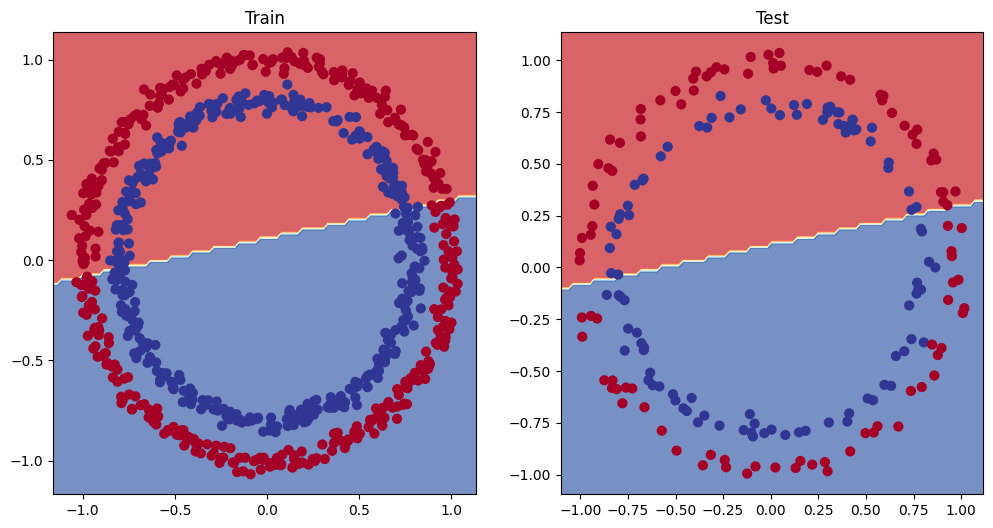

In [172]:
#plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1 , x_train , y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1 , x_test , y_test)

this is the line our model is trying to draw , this is why the loss is not going down
because it is trying to draw a linear line in the center.
can the linear line ever separate this circular data?

#improving the model(from a model's perspective)


these measures deal directly with the model than the data.
1. add more layers --> give the model more chance to learn about the patterns in the data.
2. add more hidden units --> go from 5 to 10 hidden units, to learn more
3. fit for longer --> more no. of epochs
4. changing the activation function
5. change the learning rate
6. change the loss functions


these options are all values we can change, they are called "Hyperparameters"

In [173]:
# implementing these for our models , to improve its performance

class Circle2(nn.Module):
  def __init__(self):
    super().__init__()

    #change 1 --> adding more hidden units for improvement from 5 to 10
    self.layer1 = nn.Linear(in_features = 2 , out_features = 10)
    self.layer2 = nn.Linear(in_features = 10 , out_features = 10)
    #change 2 --> adding more layers
    self.layer3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    z = self.layer1(x)  #z is logits
    z = self.layer2(z)  #updating z for each layer
    z = self.layer3(z)
    return self.layer3(self.layer2(self.layer1(x))) #x --> output of x to layer1 --> output of layer1 to layer2 --> output of layer2 to layer3

improved_model = Circle2().to(device)
improved_model

Circle2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [174]:
improved_model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310

In [175]:
#using the same loss function and the same optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = improved_model.parameters(),
                       lr=0.1)


In [176]:
# writing the training and evaluation loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# change 3--> train for longer , 100 to 1000 epochs
epochs = 1000

# put the data on the target device
x_train , y_train = x_train.to(device) , y_train.to(device)
x_test , y_test = x_test.to(device) , y_test.to(device)

for epoch in range(epochs):
  ###training
  improved_model.train()

  #1. forward pass
  y_logits = improved_model(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #raw logits --> pred probs --> pred labels

  #2. calculate the loss/acc
  train_loss = loss_fn(y_logits , y_train)  #we take y_logits here because in the loss fn we have BCEWithLogits
  train_acc = accuracy_fn(y_true = y_train , y_pred = y_pred)

  #3. optimizer zero grad
  optimizer.zero_grad()

  #4. loss backward (back propagation)
  train_loss.backward()

  #5. optimizer step (gradient descent)
  optimizer.step()

  ###testing
  improved_model.eval()
  with torch.inference_mode():

    #1. forward pass
    test_logits = improved_model(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. calculate the loss
    test_loss = loss_fn(test_logits , y_test)
    test_acc = accuracy_fn(y_true = y_test , y_pred = test_pred)

  if epoch % 100 == 0:
    print(f"epoch: {epoch} | loss: {train_loss:.5f} | acc: {train_acc:.2f}%  | test loss: {test_loss:.5f} | test acc: {test_acc:.2f}%")

epoch: 0 | loss: 0.69396 | acc: 50.88%  | test loss: 0.69261 | test acc: 51.00%
epoch: 100 | loss: 0.69305 | acc: 50.38%  | test loss: 0.69379 | test acc: 48.00%
epoch: 200 | loss: 0.69299 | acc: 51.12%  | test loss: 0.69437 | test acc: 46.00%
epoch: 300 | loss: 0.69298 | acc: 51.62%  | test loss: 0.69458 | test acc: 45.00%
epoch: 400 | loss: 0.69298 | acc: 51.12%  | test loss: 0.69465 | test acc: 46.00%
epoch: 500 | loss: 0.69298 | acc: 51.00%  | test loss: 0.69467 | test acc: 46.00%
epoch: 600 | loss: 0.69298 | acc: 51.00%  | test loss: 0.69468 | test acc: 46.00%
epoch: 700 | loss: 0.69298 | acc: 51.00%  | test loss: 0.69468 | test acc: 46.00%
epoch: 800 | loss: 0.69298 | acc: 51.00%  | test loss: 0.69468 | test acc: 46.00%
epoch: 900 | loss: 0.69298 | acc: 51.00%  | test loss: 0.69468 | test acc: 46.00%


still the model has not improved much and shows 50% accuracy, it means its not learning

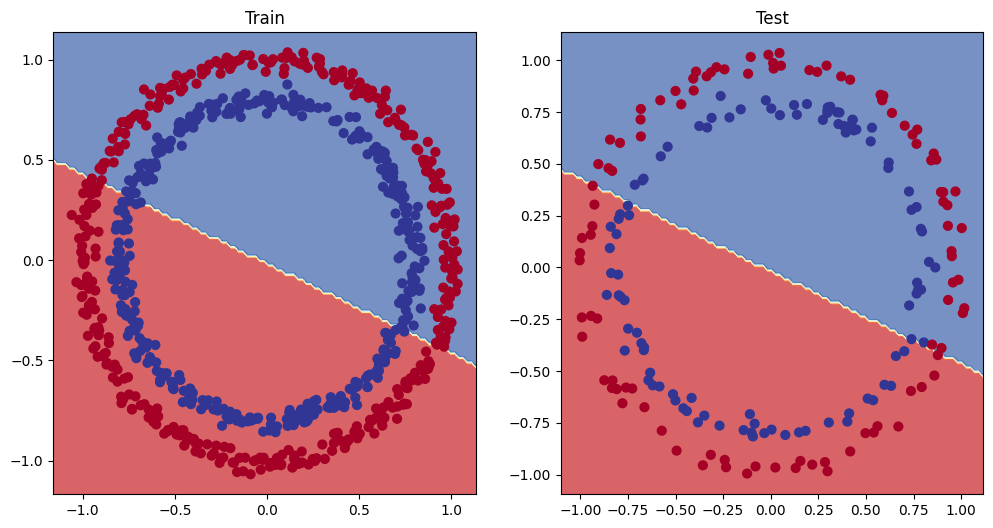

In [177]:
#plotting the decision boundary for the new model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(improved_model , x_train , y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(improved_model , x_test , y_test)

the model is not fitting on the circular dataset
the model is again trying to draw a straight line to separate the data
does this mean that our data could be non-linear??

In [178]:
##preparing data to see if our model can fit a straight line --> to troubleshoot th problem, we try to work on a simple regression task


# Same architecture as model_1 (but using nn.Sequential())
# Create train and test splits
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)


model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

print(model_2)


# Loss and optimizer
loss_fn = nn.L1Loss() # MAE loss with regression data
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")



100
Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)
Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


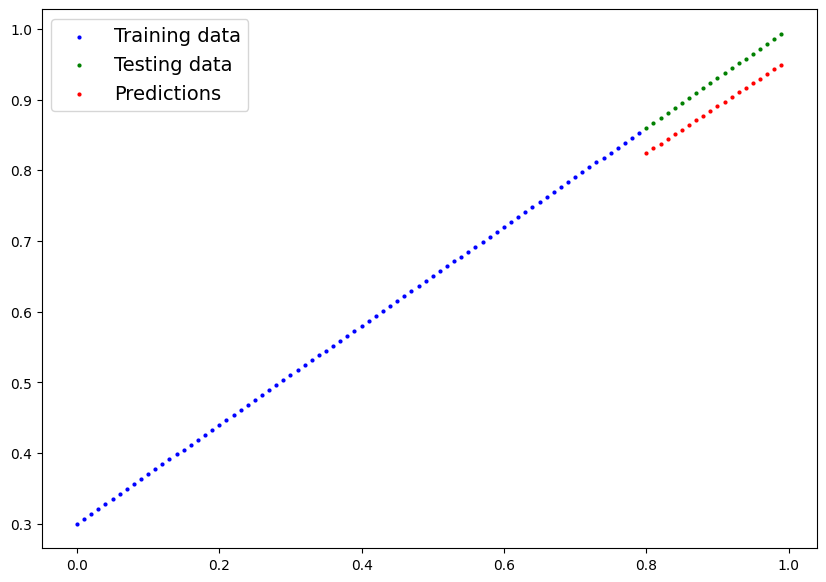

In [179]:
#evaluation
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

#plot the data
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression,
                 predictions = y_preds)

this means that the model has some capacity to learn, but this is a straight line data

so, when we have curves, they are non-linear functions.

This means the previous model did not work because, we used linear functions on it

we need **Non-Linearity** to deal with the circular data of blue and red dots.


what patterns could you draw, if you were given infinite amount of straight and non-straight lines?


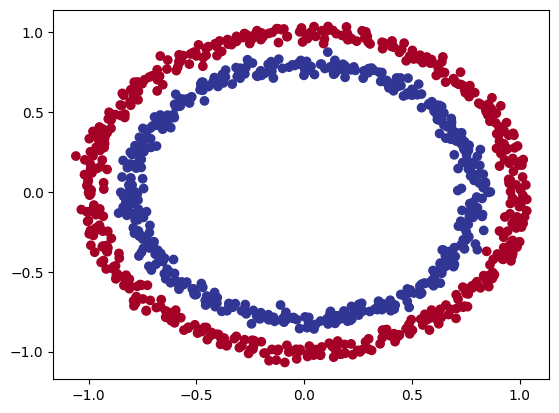

In [180]:
#Recreating Non Linear data --> for red and blue data

#make and plot the data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)

plt.scatter(X[:,0] , X[:,1] , c=y , cmap = plt.cm.RdYlBu);

In [181]:
#convert the data into tensors and then splitting the data into train and test
import torch
from sklearn.model_selection import train_test_split

#turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#split the data
X_train , X_test , y_train , y_test = train_test_split(X,y,
                                                       test_size=0.2,
                                                       random_state = 42)

X_train[:5] , y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

* linear = straight lines
* Non-Linear = non straight lines

--> artificial neural networks are the combination of linear and non-linear functions that are able to find the patterns in the data

#building a Classification model with Non-Linearity --> Correct way to deal with Circular Data


In [182]:
from torch import nn
class Circle3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 2 , out_features = 10)
    self.layer2 = nn.Linear(in_features = 10 , out_features = 10)
    self.layer3 = nn.Linear(in_features = 10 , out_features = 1)
    self.relu = nn.ReLU() #the Non-Linear function --> it applies the rectified linear unit element wise

  def forward(self,x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_3 = Circle3().to(device)
model_3

Circle3(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

 x -->  linear output of x into layer 1 --> output of layer1 into relu all negatives become 0 and we keep the +ves --> output goes into linear layer 2  --> again into relu and so on

In [183]:
#loss function and optimizer

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_3.parameters() , lr=0.1)



In [184]:
#training the model with Non-Linearity

#random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#put all the data on target device
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

#loop through the data
epochs = 1000

for epoch in range(epochs):
  ###training
  model_3.train()

  #1. forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #2. calculate the loss/acc
  loss = loss_fn(y_logits , y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  #3. optimizer zero grad
  optimizer.zero_grad()

  #4. loss backwards (back propagation)
  loss.backward()

  #5. optimizer step (gradient descent)
  optimizer.step()

  ###testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits , y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

  #print out
  if epoch % 100 == 0:
    print(f'epoch: {epoch} | loss: {loss:.4f} | acc: {acc:.2f}% | test loss: {test_loss:.4f} | test acc: {test_acc:.2f}%')

epoch: 0 | loss: 0.6929 | acc: 50.00% | test loss: 0.6932 | test acc: 50.00%
epoch: 100 | loss: 0.6912 | acc: 52.88% | test loss: 0.6910 | test acc: 52.50%
epoch: 200 | loss: 0.6898 | acc: 53.37% | test loss: 0.6894 | test acc: 55.00%
epoch: 300 | loss: 0.6879 | acc: 53.00% | test loss: 0.6872 | test acc: 56.00%
epoch: 400 | loss: 0.6852 | acc: 52.75% | test loss: 0.6841 | test acc: 56.50%
epoch: 500 | loss: 0.6810 | acc: 52.75% | test loss: 0.6794 | test acc: 56.50%
epoch: 600 | loss: 0.6751 | acc: 54.50% | test loss: 0.6729 | test acc: 56.00%
epoch: 700 | loss: 0.6666 | acc: 58.38% | test loss: 0.6632 | test acc: 59.00%
epoch: 800 | loss: 0.6516 | acc: 64.00% | test loss: 0.6476 | test acc: 67.50%
epoch: 900 | loss: 0.6236 | acc: 74.00% | test loss: 0.6215 | test acc: 79.00%


FINALLY...now the model is learning and it starts to fit after adding the relu function

In [185]:
model_3.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.6760,  0.8035],
                      [-0.1997,  0.7568],
                      [-0.1549,  0.1427],
                      [-0.9637,  0.2292],
                      [ 0.5717, -1.3426],
                      [ 0.6689,  0.1840],
                      [ 0.7970,  0.2595],
                      [ 0.3410, -0.0998],
                      [ 0.6555,  0.3186],
                      [-0.3301,  0.1802]])),
             ('layer1.bias',
              tensor([-0.3761, -0.2008, -0.2872,  0.2803, -0.4513, -0.3364, -0.3300, -0.4252,
                      -0.1989, -0.6984])),
             ('layer2.weight',
              tensor([[ 1.3081e-01, -3.7347e-01,  2.4414e-01, -4.3348e-02, -2.7270e-01,
                        1.0512e-01, -4.7109e-02,  2.5550e-01, -4.9248e-02, -9.9730e-02],
                      [ 7.9469e-01,  3.8277e-01,  1.3309e-01,  7.5399e-01,  9.7241e-01,
                        2.6996e-01,  6.2185e-01,  5.6581e-02,  5.3486e-01, -1.9274e-

In [186]:
#evaluating the model trained with non -linear activation functions

model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(x_test))).squeeze()

y_preds[:10] , y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

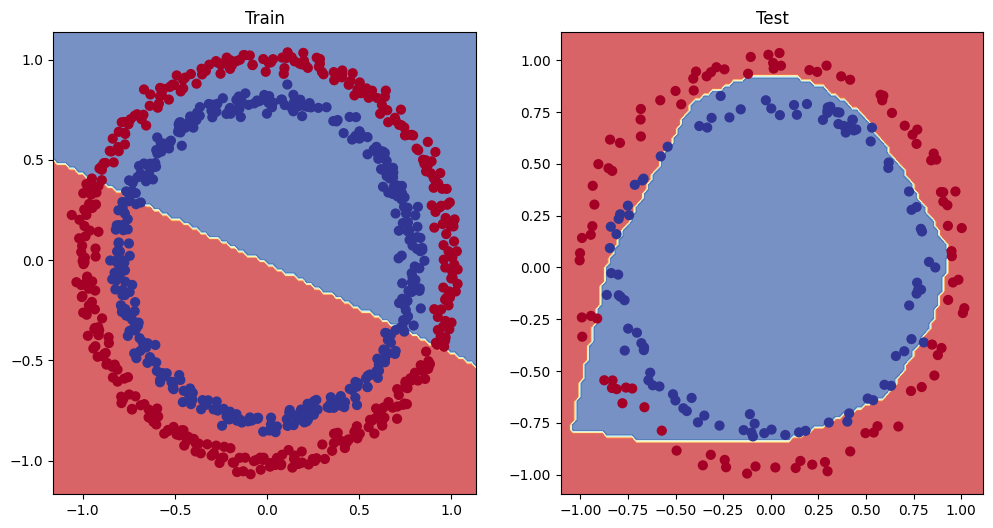

In [187]:
#plotting the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(improved_model , X_train , y_train) #no Non-Linearity
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3 , X_test , y_test) #with Non-Linearity

#Non - Linear Functions

1. Relu function
2. Sigmoid Function

In [188]:
#creating a tensor
A = torch.arange(-10,10,1 , dtype = torch.float32)
A.dtype


torch.float32

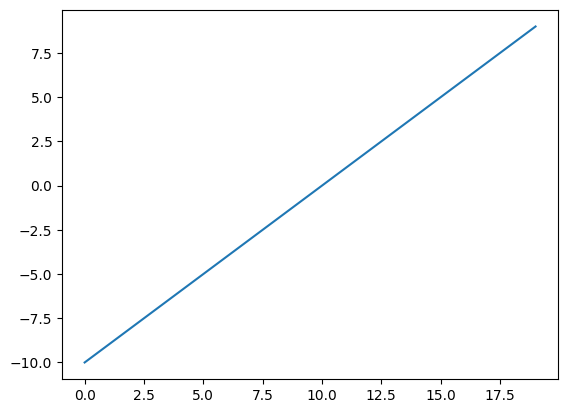

In [189]:
plt.plot(A)

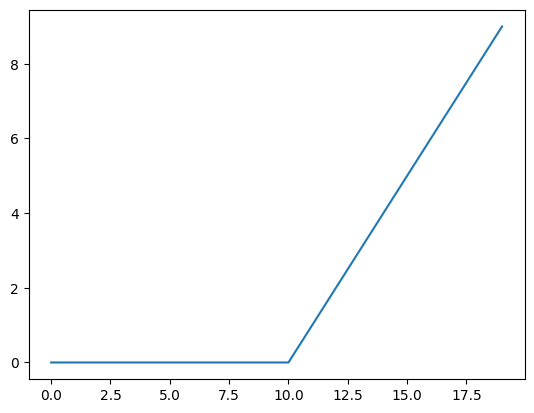

In [190]:
plt.plot(torch.relu(A))

In [191]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [192]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x) #inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

In [193]:
#this shows that the relu activation function converts all negative numbers into 0 and keeps all +ve numbers


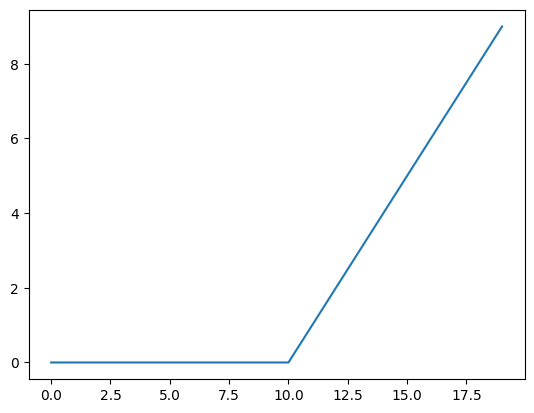

In [194]:
plt.plot(relu(A))

In [195]:
#sigmoid function

def sigmoid(x):
  return 1/(1+torch.exp(-x))

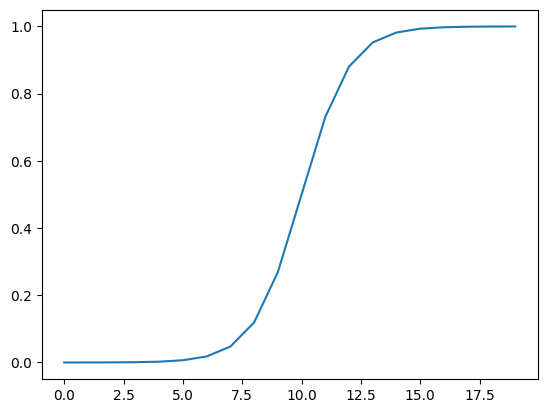

In [196]:
plt.plot(torch.sigmoid(A))

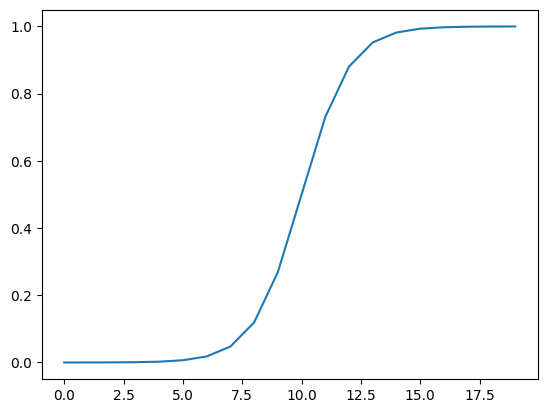

In [197]:
plt.plot(sigmoid(A))